### 🎯 Cel biznesowy:
Model powinien na podstawie cech wizualnych odkrywać naturalne struktury w danych i utworzyć grupy odpowiadające 6 gatunkom meduz:

barrel_jellyfish

blue_jellyfish

compass_jellyfish

lions_mane_jellyfish

mauve_stinger_jellyfish

Moon_jellyfish

Celem jest wykrywanie gatunków danych meduz.




In [ ]:
#!pip install opencv-python matplotlib seaborn pandas numpy scikit-learn pillow

Liczba zdjęć w zbiorze treningowym: {'barrel_jellyfish': 146, 'blue_jellyfish': 148, 'compass_jellyfish': 144, 'lions_mane_jellyfish': 144, 'mauve_stinger_jellyfish': 150, 'Moon_jellyfish': 150}
Liczba zdjęć w zbiorze testowym: {'barrel_jellyfish': 5, 'blue_jellyfish': 5, 'compass_jellyfish': 6, 'lions_mane_jellyfish': 8, 'mauve_stinger_jellyfish': 7, 'Moon_jellyfish': 6}
Liczba zdjęć w zbiorze walidacyjnym: {'barrel_jellyfish': 5, 'blue_jellyfish': 5, 'compass_jellyfish': 7, 'lions_mane_jellyfish': 7, 'mauve_stinger_jellyfish': 7, 'Moon_jellyfish': 6}


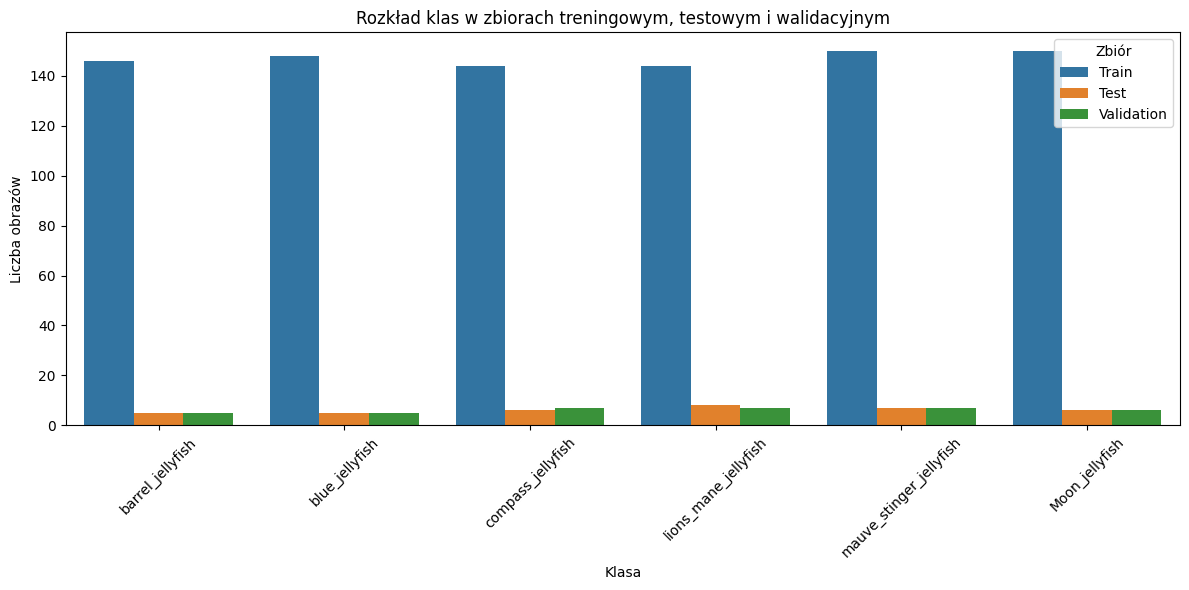

In [ ]:
# Liczba zdjęć w każdym zbiorze, ocena proporcji klas i zbalansowanie zbiorów
def count_images_in_class(files_dict):
    count_dict = {cls: len(paths) for cls, paths in files_dict.items()}
    return count_dict

train_counts = count_images_in_class(train_files)
test_counts = count_images_in_class(test_files)
valid_counts = count_images_in_class(valid_files)

print("Liczba zdjęć w zbiorze treningowym:", train_counts)
print("Liczba zdjęć w zbiorze testowym:", test_counts)
print("Liczba zdjęć w zbiorze walidacyjnym:", valid_counts)

#klasy są zrównoważone (czy każda ma podobną liczbę przykładów),
#każdy zbiór (Train/Test/Valid) ma dane ze wszystkich klas


#wykres
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Zakładam, że masz słowniki: train_counts, test_counts, valid_counts
# Tworzymy listę słowników do DataFrame
data = []

for dataset_name, counts in zip(['Train', 'Test', 'Validation'], [train_counts, test_counts, valid_counts]):
    for cls, count in counts.items():
        data.append({'Zbiór': dataset_name, 'Klasa': cls, 'Liczba obrazów': count})

df = pd.DataFrame(data)

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Klasa', y='Liczba obrazów', hue='Zbiór')
plt.title('Rozkład klas w zbiorach treningowym, testowym i walidacyjnym')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Sprawdzenie które zdjęcia należą do której klasy i zbioru
import os
import glob

# Ścieżka główna do folderu DATA
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Train_Test_Valid', 'Train')
test_path = os.path.join(data_path, 'Train_Test_Valid', 'test')
valid_path = os.path.join(data_path, 'Train_Test_Valid', 'valid')

# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

# Zestawienie plików
print("Train files:", train_files)
print("Test files:", test_files)
print("Valid files:", valid_files)


Train files: {'barrel_jellyfish': ['DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\02.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\03.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\04.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\05.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\06.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\07.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\10.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\11.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\12.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\13.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\14.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\15.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\17.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\18.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\20.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\21.jpg', 'DATA\\Train_Test_Val


Wyświetlanie przykładowych obrazków z każdego gatunku meduzy...


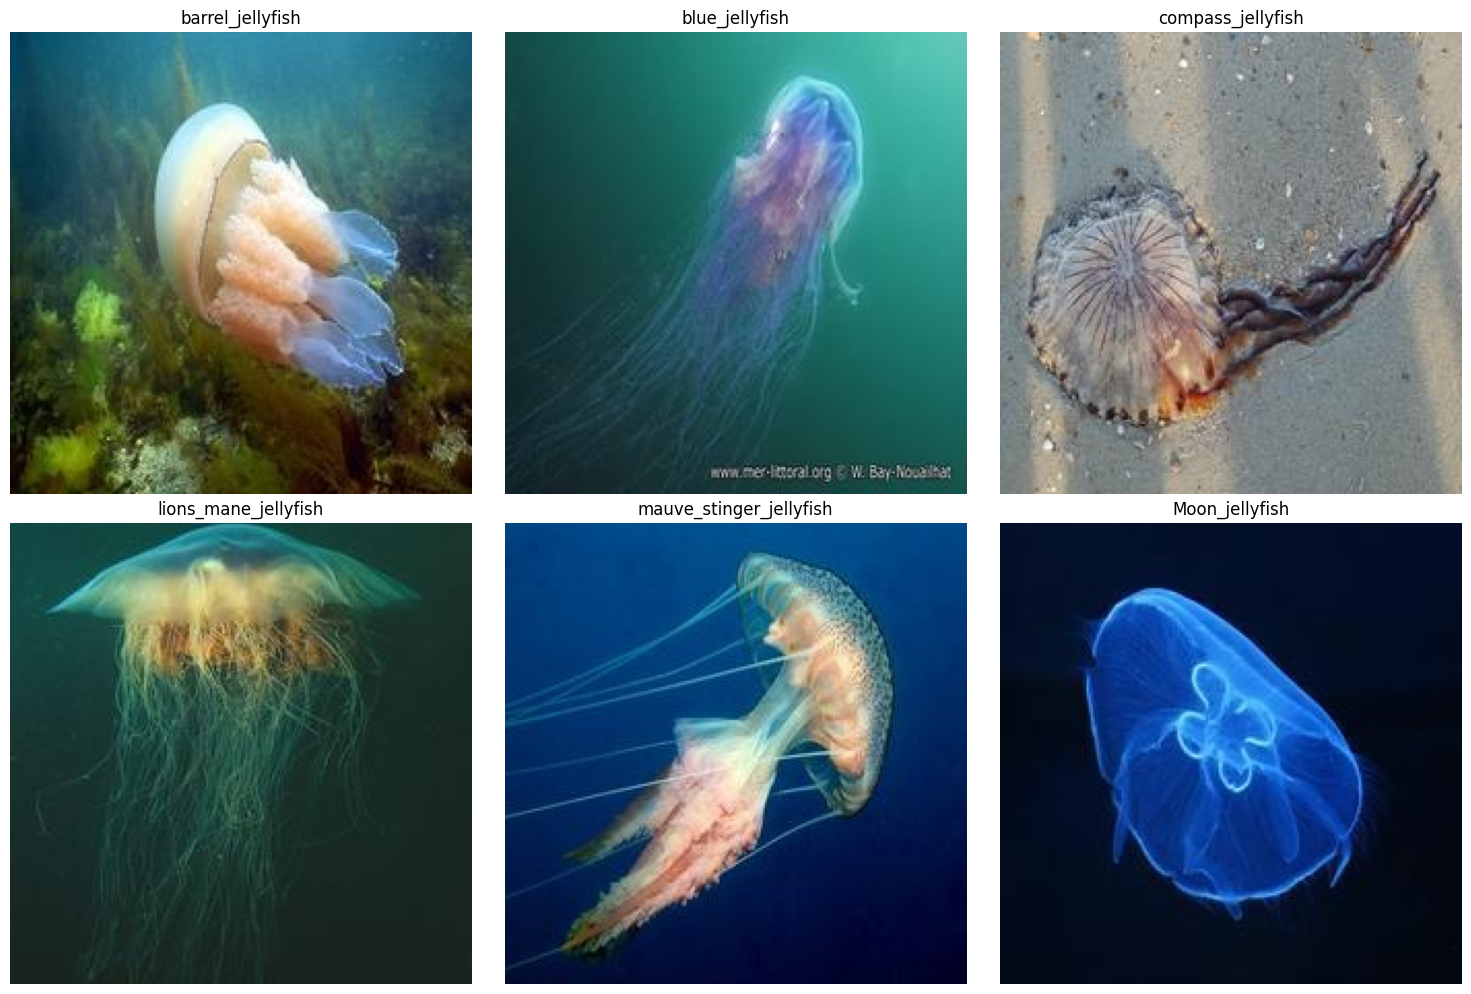

In [12]:
def show_sample_images():
    print("\nWyświetlanie przykładowych obrazków z każdego gatunku meduzy...")
    plt.figure(figsize=(15, 10))
    for i, species in enumerate(species_folders):
        species_dir = os.path.join(DATA_DIR, species)
        sample_file = os.listdir(species_dir)[0]
        img = Image.open(os.path.join(species_dir, sample_file))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(species)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images()

### Histogramy kolorów (RGB)

Tworzenie histogramu dla klasy: barrel_jellyfish


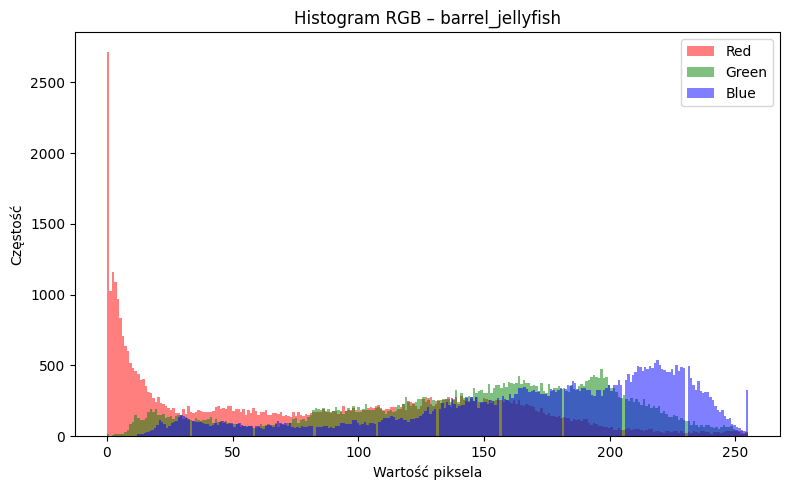

Tworzenie histogramu dla klasy: blue_jellyfish


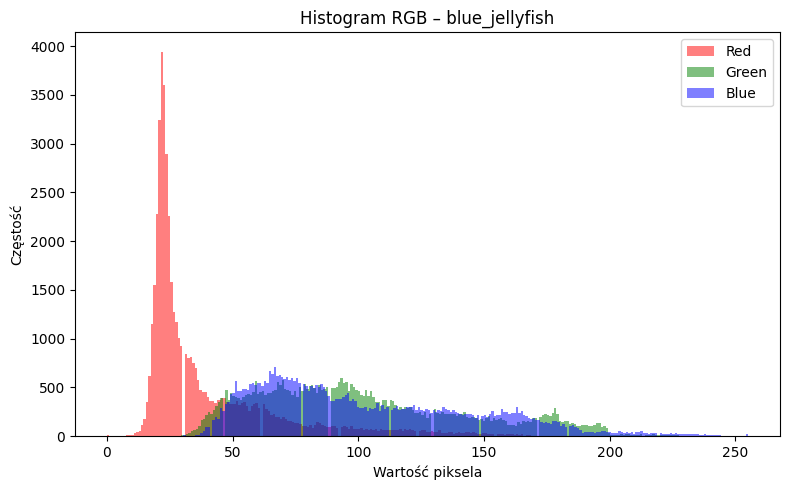

Tworzenie histogramu dla klasy: compass_jellyfish


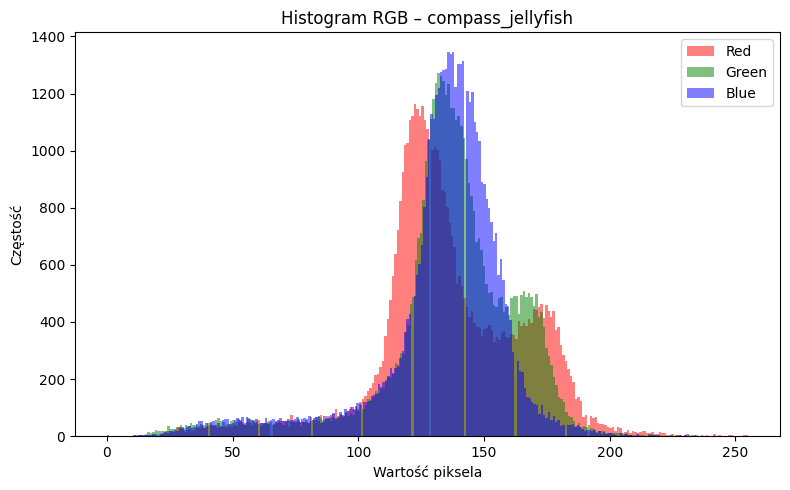

Tworzenie histogramu dla klasy: lions_mane_jellyfish


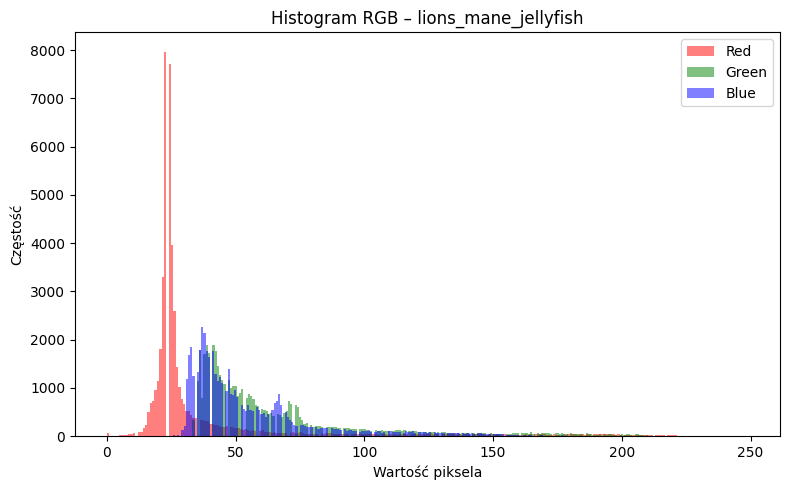

Tworzenie histogramu dla klasy: mauve_stinger_jellyfish


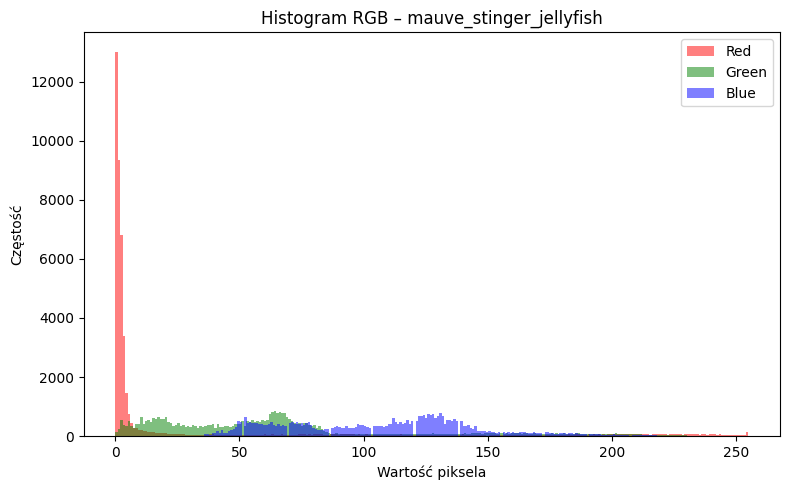

Tworzenie histogramu dla klasy: Moon_jellyfish


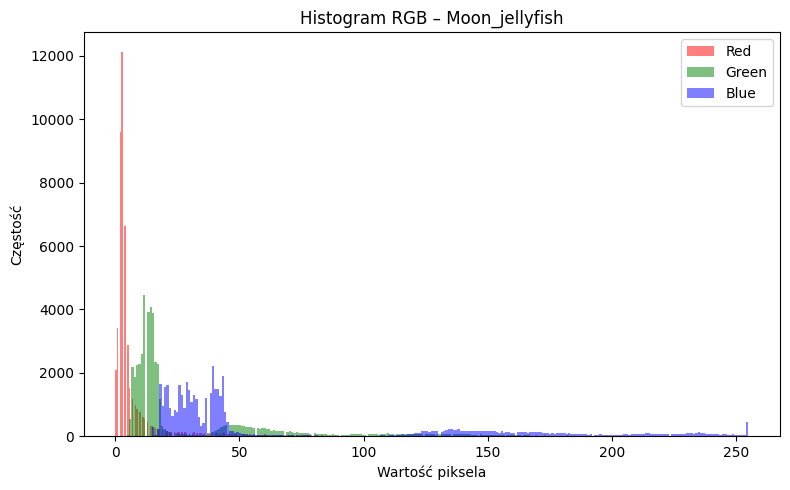

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Ścieżka do katalogu treningowego
train_path = 'DATA/Train_Test_Valid/Train'

# Lista klas (folderów)
classes = [cls for cls in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, cls))]

# Funkcja: rysuj histogram RGB dla jednego obrazu
def plot_rgb_histogram(image_path, class_name):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Nie można załadować obrazu: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)
    
    plt.figure(figsize=(8, 5))
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.title(f'Histogram RGB – {class_name}')
    plt.xlabel('Wartość piksela')
    plt.ylabel('Częstość')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Przechodzimy przez wszystkie klasy
for class_name in classes:
    class_folder = os.path.join(train_path, class_name)
    image_paths = glob.glob(os.path.join(class_folder, '*.jpg'))
    
    if not image_paths:
        print(f"Brak obrazów dla klasy {class_name}")
        continue

    # Wybieramy pierwszy obraz z każdej klasy do analizy
    sample_image_path = image_paths[0]
    print(f"Tworzenie histogramu dla klasy: {class_name}")
    plot_rgb_histogram(sample_image_path, class_name)


In [9]:
def image_sizes(image_paths):
    sizes = []
    for path in image_paths:
        img = cv2.imread(path)
        sizes.append(img.shape[:2])  # (height, width)
    return sizes

# Przykładowe rozmiary dla klasy "barrel_jellyfish"
sizes_barrel_jellyfish = image_sizes(train_files['barrel_jellyfish'])
print("Rozmiary obrazów dla Barrel Jellyfish:", sizes_barrel_jellyfish)


Rozmiary obrazów dla Barrel Jellyfish: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (179, 179), (224, 224), (179, 179), (179, 179), (224, 224), (224, 224), (224, 224), (224, 224), (179, 179), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (179, 179), (179, 179), (224, 224), (179, 179), (224, 224), (224, 224), (179, 179), (179, 179), (179, 179), (224, 224), (224, 224), (179, 179), (224, 224), (224, 224), (224, 224), (179, 179), (224, 224), (179, 179), (224, 224), (179, 179), (179, 179), (224, 224), 

Znaleziono 6 gatunków meduz: ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']


Przetwarzanie gatunków: 100%|██████████| 6/6 [00:09<00:00,  1.63s/it]


Tabela metryk:


,avg_width,avg_height,avg_aspect_ratio,avg_brightness,avg_unique_colors,avg_blur
barrel_jellyfish,207.972603,207.972603,1.0,111.023616,6783.013699,1254.746583
blue_jellyfish,211.22973,211.22973,1.0,84.304905,5473.236486,1145.79903
compass_jellyfish,211.8125,211.8125,1.0,106.041397,6379.458333,1844.739371
lions_mane_jellyfish,211.1875,211.1875,1.0,77.460661,6368.451389,2340.30324
mauve_stinger_jellyfish,211.4,211.4,1.0,87.438584,6265.313333,2015.69856
Moon_jellyfish,209.9,209.9,1.0,54.450675,5162.546667,1296.6777


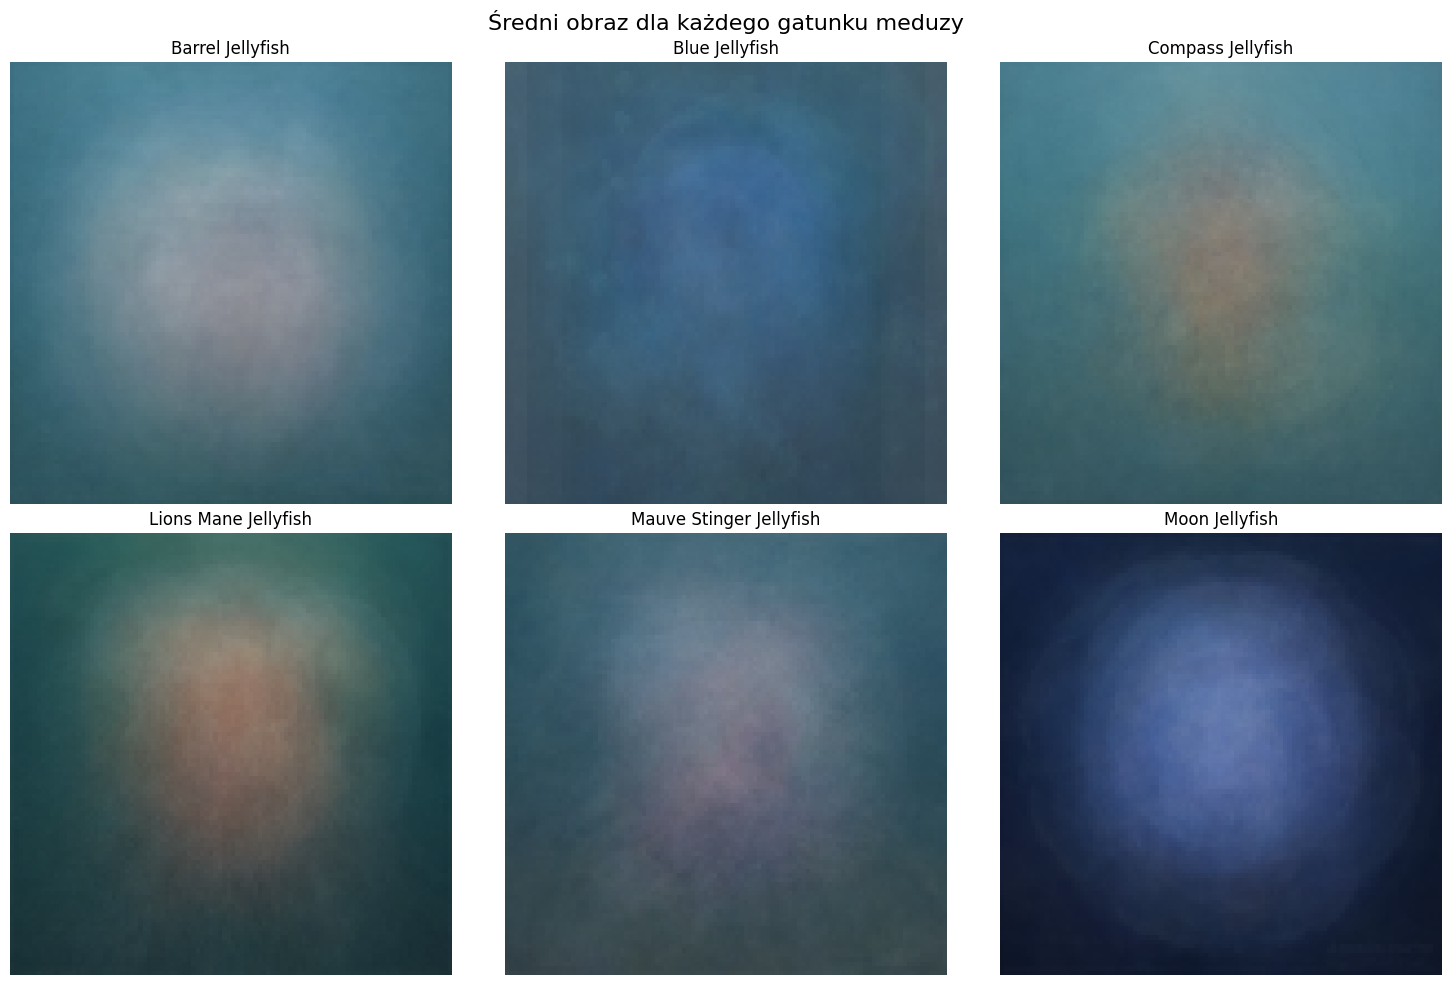

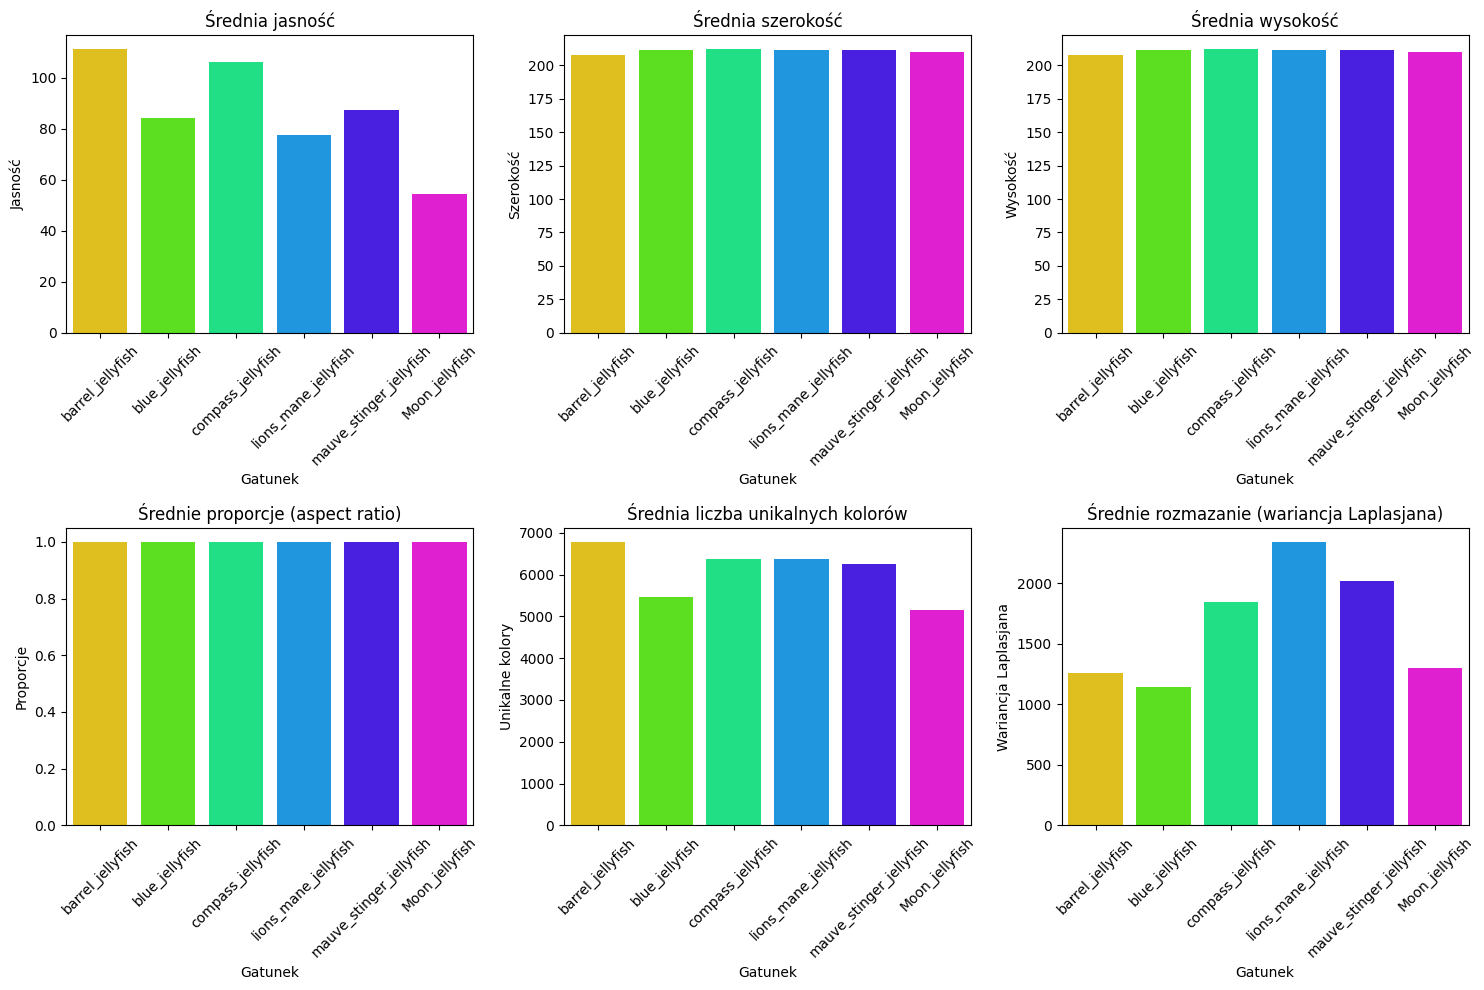

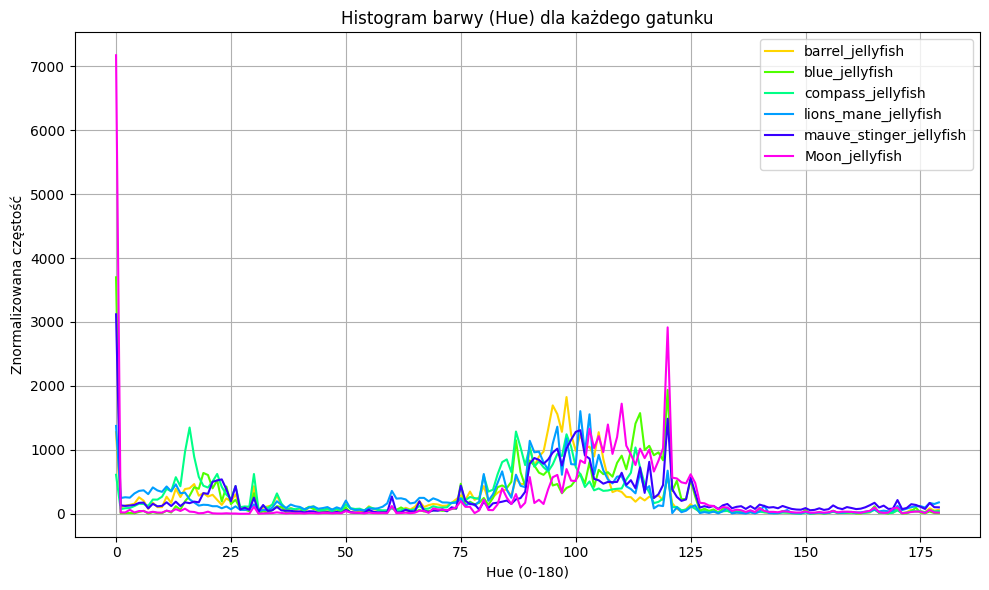

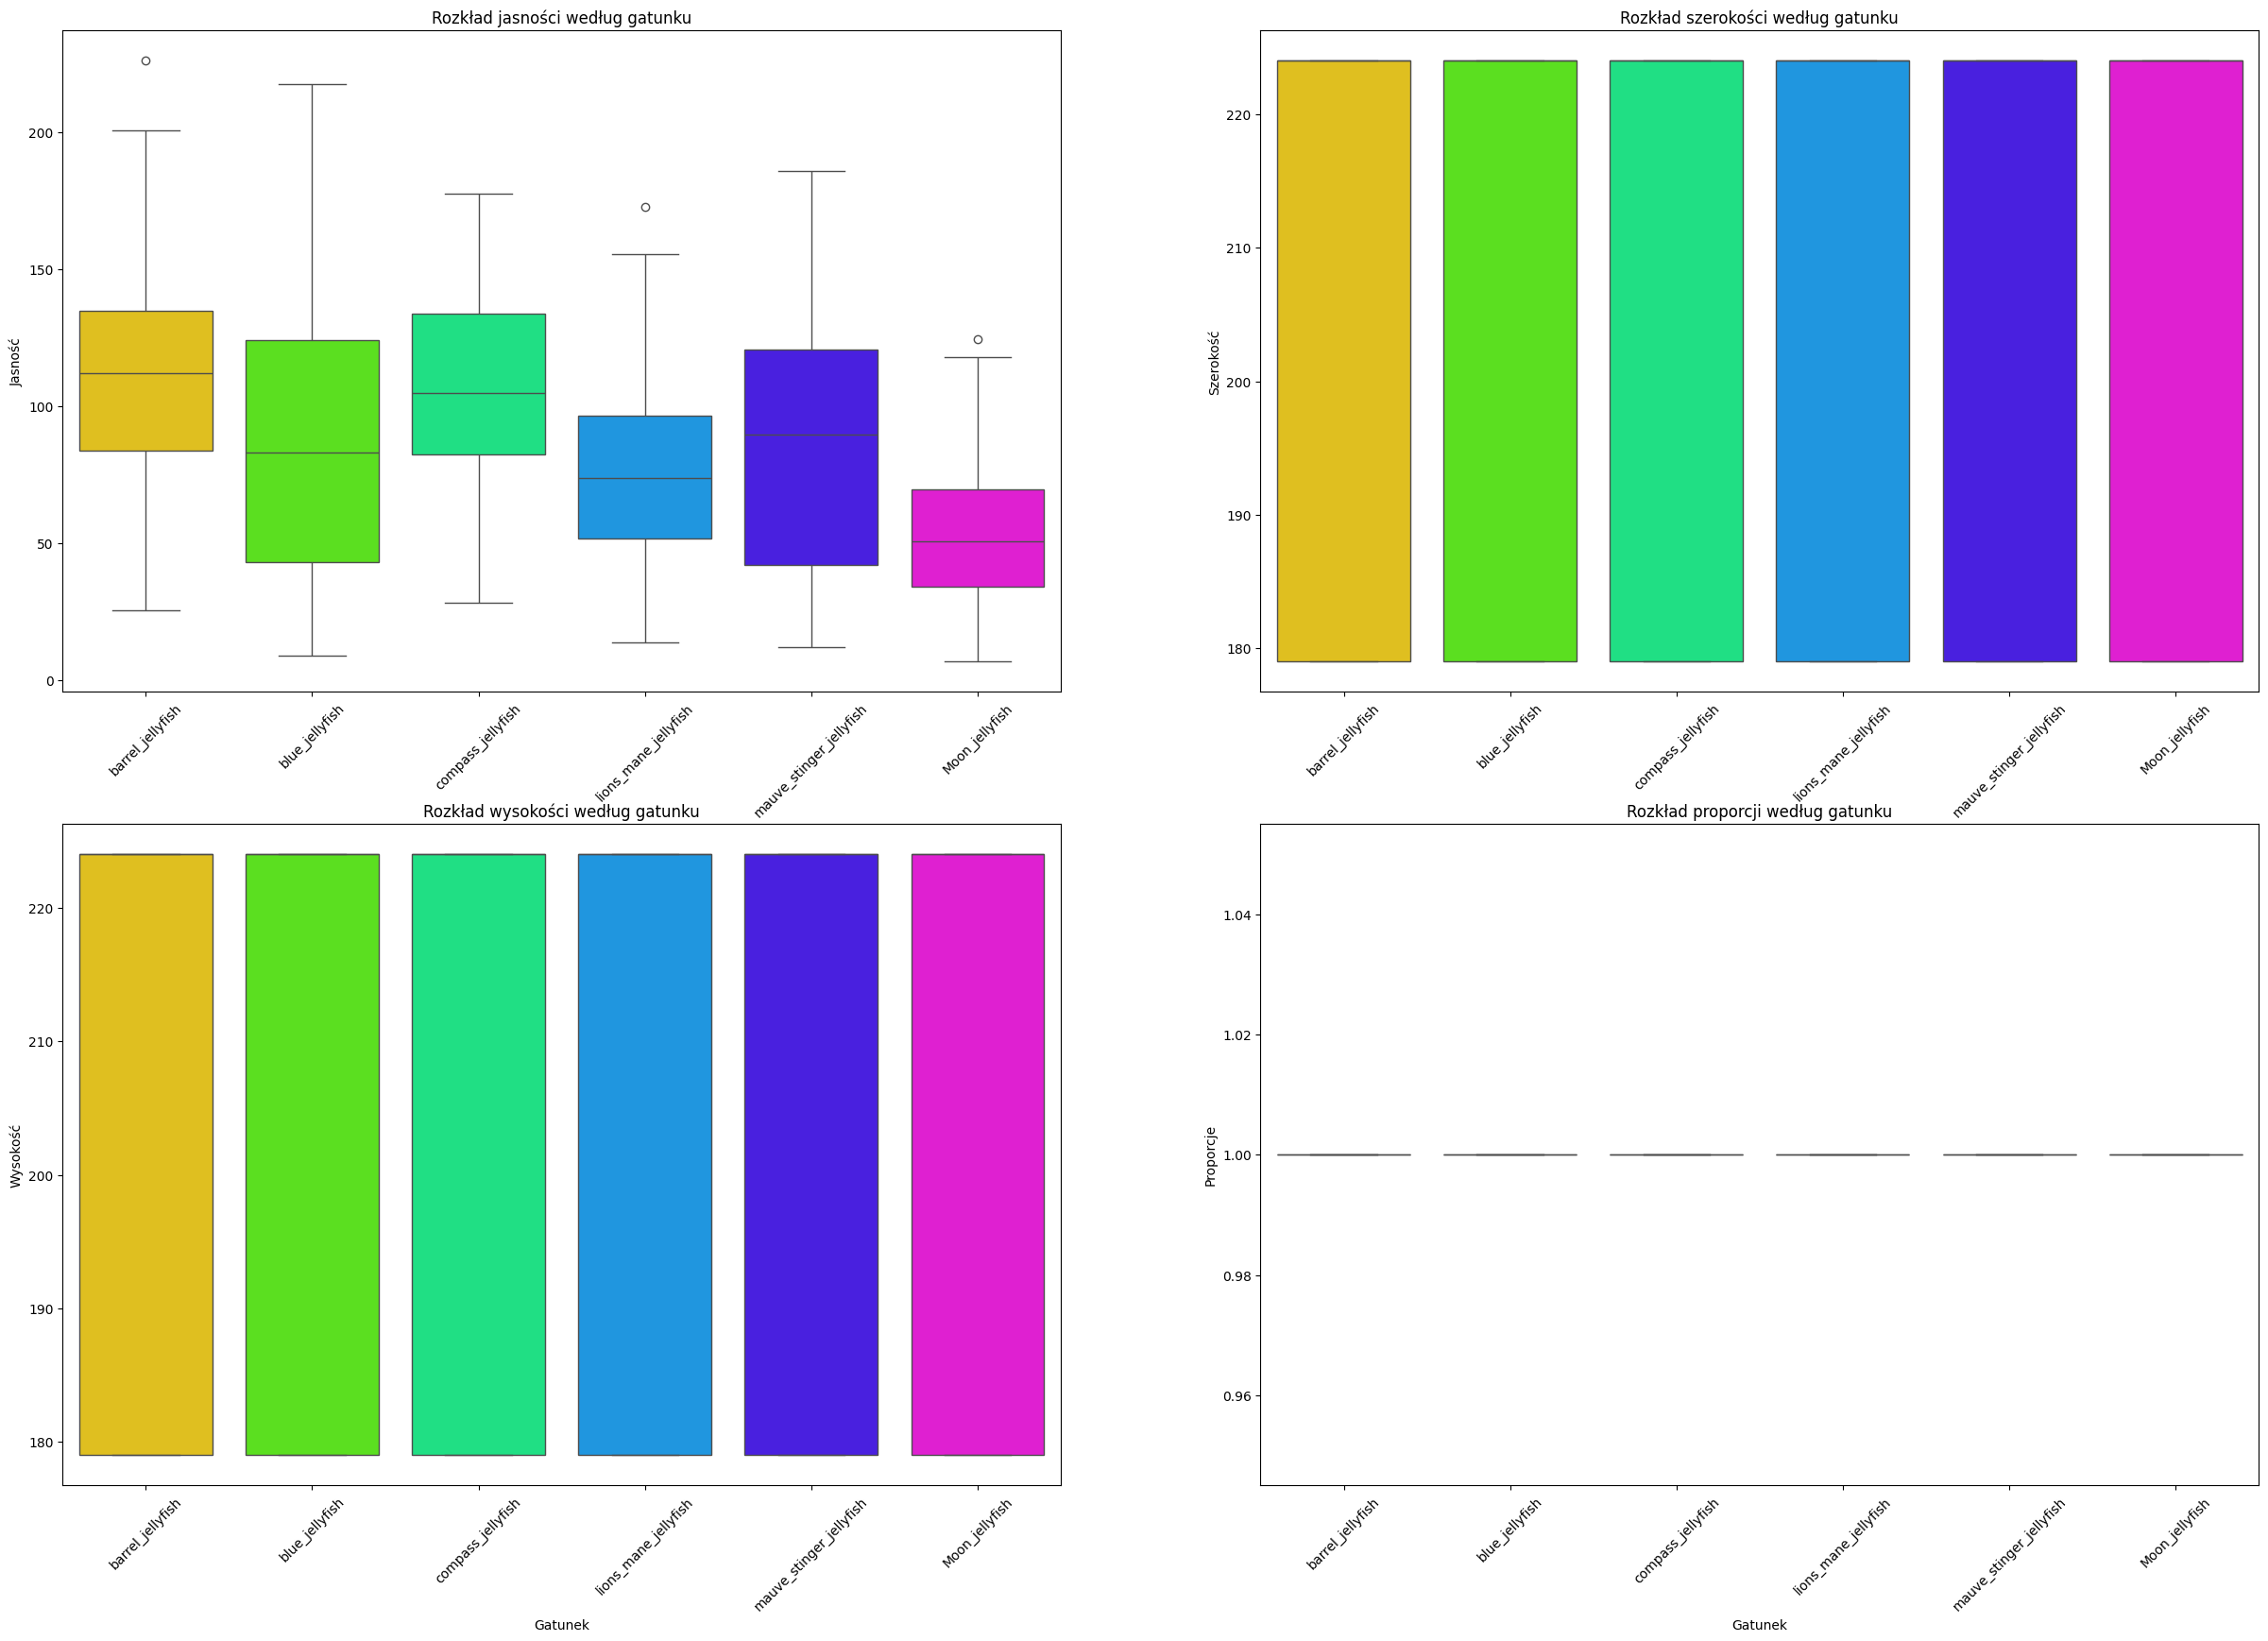

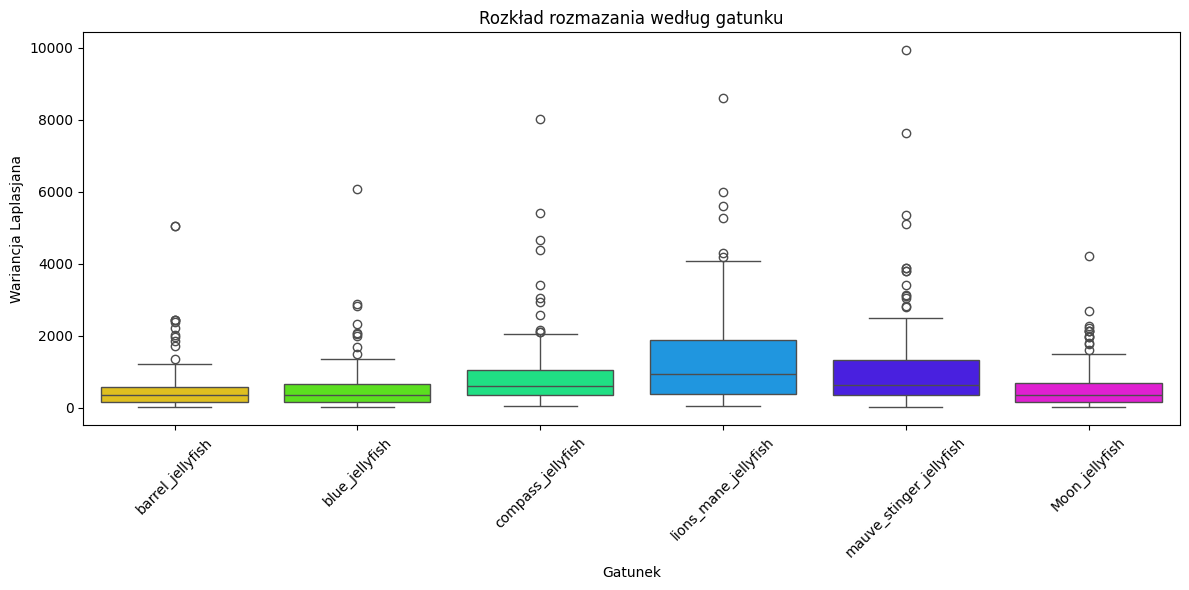


Statystyki szczegółowe dla każdej cechy według gatunku:


brightness                                    \
                               mean        std        min         max   
species                                                                 
Moon_jellyfish            54.450675  26.860373   6.755401  124.540418   
barrel_jellyfish         111.023616  35.582509  25.557916  226.297473   
blue_jellyfish            84.304905  48.495968   8.937480  217.779476   
compass_jellyfish        106.041397  34.141775  28.247369  177.558597   
lions_mane_jellyfish      77.460661  32.808988  13.798728  172.805365   
mauve_stinger_jellyfish   87.438584  46.002807  12.033084  185.819296   

                              width                           height  \
                               mean        std  min  max        mean   
species                                                                
Moon_jellyfish           209.900000  20.943116  179  224  209.900000   
barrel_jellyfish         207.972603  21.623086  179  224  207.972603   
blue_jellyfish           211.229730  20.356381  179  224  211.229730   
compass_jellyfish        211.812500  20.067358  179  224  211.812500   
lions_mane_jellyfish     211.187500  20.378574  179  224  211.187500   
mauve_stinger_jellyfish  211.400000  20.272638  179  224  211.400000   

                                             aspect_ratio                 \
                               std  min  max         mean  std  min  max   
species                                                                    
Moon_jellyfish           20.943116  179  224          1.0  0.0  1.0  1.0   
barrel_jellyfish         21.623086  179  224          1.0  0.0  1.0  1.0   
blue_jellyfish           20.356381  179  224          1.0  0.0  1.0  1.0   
compass_jellyfish        20.067358  179  224          1.0  0.0  1.0  1.0   
lions_mane_jellyfish     20.378574  179  224          1.0  0.0  1.0  1.0   
mauve_stinger_jellyfish  20.272638  179  224          1.0  0.0  1.0  1.0   

                                blur                                       
                                mean          std        min          max  
species                                                                    
Moon_jellyfish            567.139076   631.540701  24.547427  4221.199896  
barrel_jellyfish          538.037502   741.259695  28.676676  5038.260798  
blue_jellyfish            548.740232   703.532961  10.681421  6079.320627  
compass_jellyfish         887.857267  1034.885265  50.121651  8017.759666  
lions_mane_jellyfish     1365.111630  1379.678125  54.481960  8608.930092  
mauve_stinger_jellyfish  1126.390326  1358.475255   5.276148  9938.208383

In [41]:
import os
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from tqdm import tqdm

base_path = Path("DATA/Train_Test_Valid/Train")

species_dirs = [d for d in base_path.iterdir() if d.is_dir()]
species_names = [d.name for d in species_dirs]
print(f"Znaleziono {len(species_names)} gatunków meduz: {species_names}")

metrics = defaultdict(dict)

colors = sns.color_palette("hsv", len(species_names))


for species_dir in tqdm(species_dirs, desc="Przetwarzanie gatunków"):
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    
    widths, heights, aspect_ratios, brightness_vals, unique_colors, blur_vals = [], [], [], [], [], []
    hsv_hist_total = np.zeros((180, 1))  # tylko hue do histogramu
    avg_image = None

    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            print(f"Nie można wczytać obrazu: {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)  
        brightness_vals.append(np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

        # HSV histogram
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hist_hue = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        hsv_hist_total += hist_hue

        # Średni obraz
        img = cv2.resize(img, (100, 100))  
        if avg_image is None:
            avg_image = np.zeros_like(img, dtype=np.float64)
        avg_image += img / len(image_paths)

        # Liczba unikalnych kolorów
        unique_colors.append(len(np.unique(img.reshape(-1, 3), axis=0)))

        # Metryka rozmazania 
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        laplacian_var = cv2.Laplacian(gray_img, cv2.CV_64F).var()
        blur_vals.append(laplacian_var)

   
    metrics[species]['avg_width'] = np.mean(widths)
    metrics[species]['avg_height'] = np.mean(heights)
    metrics[species]['avg_aspect_ratio'] = np.mean(aspect_ratios)
    metrics[species]['avg_brightness'] = np.mean(brightness_vals)
    metrics[species]['avg_unique_colors'] = np.mean(unique_colors)
    metrics[species]['avg_blur'] = np.mean(blur_vals)  
    metrics[species]['hue_hist'] = hsv_hist_total / len(image_paths)
    metrics[species]['avg_image'] = avg_image.astype(np.uint8)


df_metrics = pd.DataFrame(metrics).T
df_metrics = df_metrics[['avg_width', 'avg_height', 'avg_aspect_ratio', 'avg_brightness', 'avg_unique_colors', 'avg_blur']]
print("\nTabela metryk:")
display(df_metrics)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, species in enumerate(species_names):
    axes[idx].imshow(metrics[species]['avg_image'])
    axes[idx].axis('off')
    axes[idx].set_title(species.replace("_", " ").title())
fig.suptitle("Średni obraz dla każdego gatunku meduzy", fontsize=16)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_brightness'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia jasność')
plt.xlabel('Gatunek')
plt.ylabel('Jasność')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_width'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia szerokość')
plt.xlabel('Gatunek')
plt.ylabel('Szerokość')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_height'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia wysokość')
plt.xlabel('Gatunek')
plt.ylabel('Wysokość')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_aspect_ratio'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnie proporcje (aspect ratio)')
plt.xlabel('Gatunek')
plt.ylabel('Proporcje')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_unique_colors'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia liczba unikalnych kolorów')
plt.xlabel('Gatunek')
plt.ylabel('Unikalne kolory')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)  
sns.barplot(x=df_metrics.index, y=df_metrics['avg_blur'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnie rozmazanie (wariancja Laplasjana)')
plt.xlabel('Gatunek')
plt.ylabel('Wariancja Laplasjana')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#  Histogramy Hue (HSV) dla każdego gatunku
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_names):
    plt.plot(metrics[species]['hue_hist'], label=species, color=colors[idx])
plt.title('Histogram barwy (Hue) dla każdego gatunku')
plt.xlabel('Hue (0-180)')
plt.ylabel('Znormalizowana częstość')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

data = []
for species_dir in species_dirs:
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            print(f"Nie można wczytać obrazu: {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        data.append({
            'species': species,
            'width': w,
            'height': h,
            'aspect_ratio': w / h,
            'brightness': np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)),
            'blur': cv2.Laplacian(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.CV_64F).var()  
        })

df_individual = pd.DataFrame(data)

plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='brightness', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład jasności według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Jasność')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='width', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład szerokości według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Szerokość')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='height', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład wysokości według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Wysokość')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='aspect_ratio', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład proporcji według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Proporcje')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='blur', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład rozmazania według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Wariancja Laplasjana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statystyki szczegółowe
print("\nStatystyki szczegółowe dla każdej cechy według gatunku:")
stats = df_individual.groupby('species').agg({
    'brightness': ['mean', 'std', 'min', 'max'],
    'width': ['mean', 'std', 'min', 'max'],
    'height': ['mean', 'std', 'min', 'max'],
    'aspect_ratio': ['mean', 'std', 'min', 'max'],
    'blur': ['mean', 'std', 'min', 'max']  
})
display(stats)

#Hue reprezentuje odcień koloru, co jest bardziej intuicyjne niż histogramy RGB w kontekście analizy kolorystycznej.
#Wizualizuje je na jednym wykresie, co pozwala porównać rozkład kolorów między gatunkami.

#Średni obraz: Kod generuje średni obraz dla każdego gatunku, co jest unikalną wizualizacją, pomagającą zobaczyć "typowy" wygląd meduzy danego gatunku.
#Liczba unikalnych kolorów: Oblicza średnią liczbę unikalnych kolorów, co może wskazywać na różnorodność kolorystyczną obrazów.
#Tabela metryk: podsumowuje kluczowe cechy, co jest przydatne do dalszej analizy.
#Aspekt ratio: Oblicza średnie proporcje obrazów, czyli stosunek szerokości do wysokości

# width i height:
Wariancja między gatunkami: Średnie wartości szerokości i wysokości są bardzo zbliżone (około 207–212 pikseli), z różnicą maksymalną około 4 piksele.
Wariancja wewnątrz gatunku: Odchylenie standardowe jest małe (około 20 pikseli), a wartości minimalne i maksymalne są takie same dla wszystkich gatunków (179–224).
Wniosek: width i height mają bardzo małą wariancję, ponieważ obrazy zostały prawdopodobnie przeskalowane do podobnych rozmiarów (wszystkie są kwadratowe, co potwierdza aspect_ratio). Te cechy nie są użyteczne do wykrywania anomalii.
# aspect_ratio:
Wariancja: Proporcje są zawsze równe 1.0 (wszystkie obrazy są kwadratowe), a odchylenie standardowe wynosi 0.
Wniosek: aspect_ratio jest całkowicie niezmienny i nie nadaje się do wykrywania anomalii.
# brightness:
Wariancja między gatunkami: Średnie wartości jasności różnią się znacząco – od 54.45 (Moon_jellyfish) do 111.02 (barrel_jellyfish), czyli różnica wynosi około 56.57.
Wariancja wewnątrz gatunku: Odchylenie standardowe (std) jest dość duże, np. 48.50 dla blue_jellyfish, co wskazuje, że obrazy w obrębie gatunku różnią się jasnością.
Ekstremalne wartości: Wartości minimalne (np. 6.76 dla Moon_jellyfish) i maksymalne (np. 226.30 dla barrel_jellyfish) pokazują, że istnieją obrazy bardzo ciemne i bardzo jasne.
Wniosek: brightness wykazuje dużą wariancję i jest użyteczny w wykrywaniu anomalii, ponieważ nietypowo ciemne lub jasne obrazy mogą być anomaliami.
# unique_colors:
Wariancja między gatunkami: Wartości różnią się od 5162.55 do 6783.01, czyli różnica wynosi około 1620.47.
Wariancja wewnątrz gatunku: Nie mamy odchylenia standardowego, ale wcześniejsze histogramy (jeśli je wygenerowałeś) mogą pokazać zmienność.
Wniosek: unique_colors również wykazuje wariancję i jest użyteczny w wykrywaniu anomalii (np. obrazy z nietypowo małą lub dużą liczbą kolorów).
# blur
Wariancja między gatunkami: Średnie wartości blur różnią się znacząco – od 538.04 (barrel_jellyfish) do 1365.11 (lions_mane_jellyfish), czyli różnica wynosi około 827.07.
Wariancja wewnątrz gatunku: Odchylenie standardowe jest bardzo duże (np. 1379.68 dla lions_mane_jellyfish), co wskazuje na ogromną zmienność ostrości obrazów w obrębie gatunku.
Ekstremalne wartości: Wartości minimalne są bardzo niskie (np. 5.28 dla mauve_stinger_jellyfish), a maksymalne bardzo wysokie (np. 9938.21 dla mauve_stinger_jellyfish), co sugeruje, że w każdym gatunku istnieją zarówno bardzo rozmazane, jak i bardzo ostre obrazy.
Wniosek: blur wykazuje bardzo dużą wariancję, zarówno między gatunkami, jak i wewnątrz gatunków. Jest to użyteczna cecha do wykrywania anomalii, ponieważ nietypowo rozmazane lub nienaturalnie ostre obrazy mogą być anomaliami.


Wykryte anomalie:
Nie wykryto anomalii.


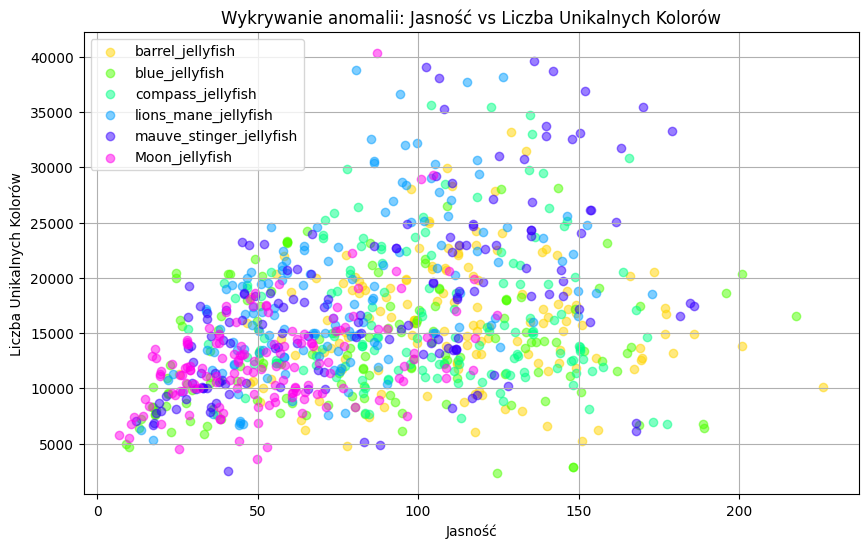

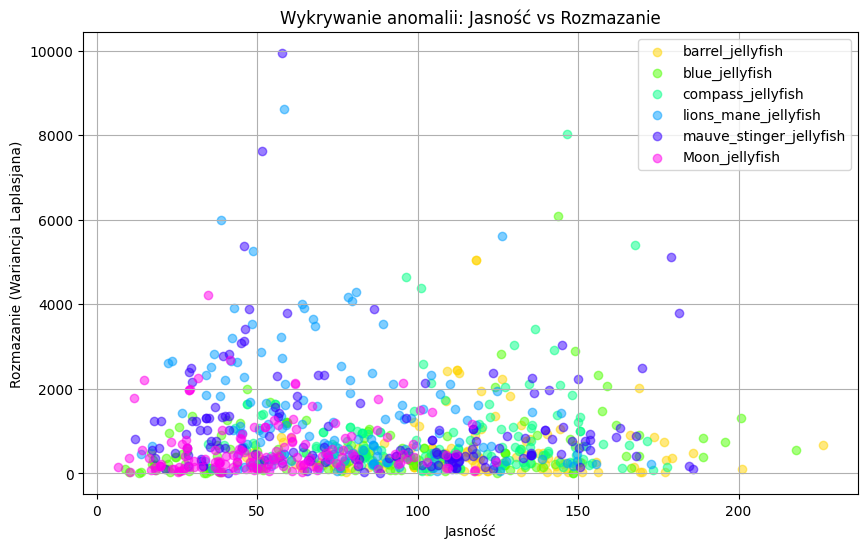

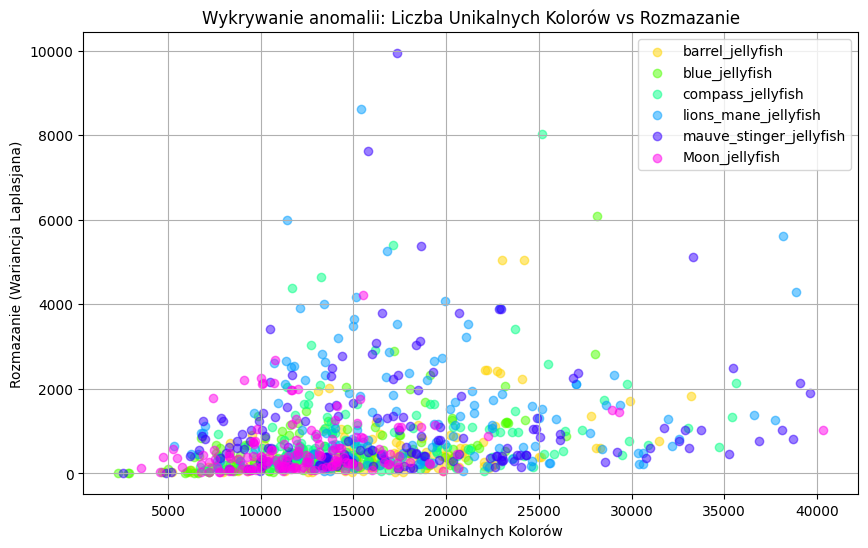

In [43]:
# Wykrywanie anomalii

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import numpy as np
import cv2
from pathlib import Path

if 'unique_colors' not in df_individual.columns:
    unique_colors_list = []
    base_path = Path("DATA/Train_Test_Valid/Train")
    species_dirs = [d for d in base_path.iterdir() if d.is_dir()]
    for species_dir in species_dirs:
        species = species_dir.name
        image_paths = list(species_dir.glob("*.jpg"))
        for path in image_paths:
            img = cv2.imread(str(path))
            if img is None:
                unique_colors_list.append(np.nan)
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            unique_colors = len(np.unique(img.reshape(-1, 3), axis=0))
            unique_colors_list.append(unique_colors)
    
    # Dopasowanie listy unique_colors do df_individual
    df_individual['unique_colors'] = unique_colors_list[:len(df_individual)]

# 🔍 Wykrywanie anomalii dla każdego gatunku
anomalies = []
features = ['brightness', 'unique_colors', 'blur']  # Uwzględniamy brightness, unique_colors i blur
contamination = 0.1  # 10% anomalii
iso_forest = IsolationForest(contamination=contamination, random_state=42)

for species in species_names:
    # Wybierz dane dla danego gatunku
    species_subset = df_individual[df_individual['species'] == species].copy()
    species_data = species_subset[features].dropna()
    
    if len(species_data) < 5:  # Minimalna liczba próbek
        print(f"Za mało danych dla gatunku {species}, pomijam.")
        continue
    
    # Dopasowanie modelu Isolation Forest
    iso_forest.fit(species_data)
    predictions = iso_forest.predict(species_data)
    
    # -1 oznacza anomalię, 1 to normalne dane
    anomaly_indices = species_data.index[predictions == -1]
    species_anomalies = species_subset.loc[anomaly_indices].copy()
    
    # 📏 Filtrowanie anomalii na podstawie odchylenia standardowego
    if not species_anomalies.empty:
        for feature in features:
            mean_val = species_data[feature].mean()
            std_val = species_data[feature].std()
            # Anomalia musi być poza 2 odchyleniami standardowymi od średniej
            species_anomalies = species_anomalies[
                (species_anomalies[feature] < mean_val - 2 * std_val) |
                (species_anomalies[feature] > mean_val + 2 * std_val)
            ]
        if not species_anomalies.empty:
            anomalies.append(species_anomalies)

# 📊 Połączenie wyników
df_anomalies = pd.concat(anomalies, ignore_index=True) if anomalies else pd.DataFrame()
print("\nWykryte anomalie:")
if not df_anomalies.empty:
    print(df_anomalies[['species', 'brightness', 'unique_colors', 'blur']])
else:
    print("Nie wykryto anomalii.")

# 📈 Wizualizacja anomalii (jasność vs liczba unikalnych kolorów)
plt.figure(figsize=(10, 6))
colors = sns.color_palette("hsv", len(species_names))
for idx, species in enumerate(species_names):
    species_data = df_individual[df_individual['species'] == species]
    plt.scatter(species_data['brightness'], species_data['unique_colors'], 
                label=species, alpha=0.5, color=colors[idx])
if not df_anomalies.empty:
    plt.scatter(df_anomalies['brightness'], df_anomalies['unique_colors'], 
                c='red', marker='x', s=100, label='Anomalie')
plt.title('Wykrywanie anomalii: Jasność vs Liczba Unikalnych Kolorów')
plt.xlabel('Jasność')
plt.ylabel('Liczba Unikalnych Kolorów')
plt.legend()
plt.grid(True)
plt.show()

# 📈 Wizualizacja: jasność vs blur
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_names):
    species_data = df_individual[df_individual['species'] == species]
    plt.scatter(species_data['brightness'], species_data['blur'], 
                label=species, alpha=0.5, color=colors[idx])
if not df_anomalies.empty:
    plt.scatter(df_anomalies['brightness'], df_anomalies['blur'], 
                c='red', marker='x', s=100, label='Anomalie')
plt.title('Wykrywanie anomalii: Jasność vs Rozmazanie')
plt.xlabel('Jasność')
plt.ylabel('Rozmazanie (Wariancja Laplasjana)')
plt.legend()
plt.grid(True)
plt.show()

# 📈 Wizualizacja: unique_colors vs blur
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_names):
    species_data = df_individual[df_individual['species'] == species]
    plt.scatter(species_data['unique_colors'], species_data['blur'], 
                label=species, alpha=0.5, color=colors[idx])
if not df_anomalies.empty:
    plt.scatter(df_anomalies['unique_colors'], df_anomalies['blur'], 
                c='red', marker='x', s=100, label='Anomalie')
plt.title('Wykrywanie anomalii: Liczba Unikalnych Kolorów vs Rozmazanie')
plt.xlabel('Liczba Unikalnych Kolorów')
plt.ylabel('Rozmazanie (Wariancja Laplasjana)')
plt.legend()
plt.grid(True)
plt.show()





In [47]:
#Weryfikacja poprawnosci zdjęć - sprawdzenie rozmiaru, wczytania, wymiarów, liczby kanałów, wartości pikseli, rozmiaru pliku w stosunku do wymiarów

import os
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm


# 📊 Ustawienia wyświetlania Pandas dla pełnej ramki danych
pd.set_option('display.max_rows', None)  # Wyświetl wszystkie wiersze
pd.set_option('display.max_columns', None)  # Wyświetl wszystkie kolumny
pd.set_option('display.width', None)  # Usuń ograniczenie szerokości
pd.set_option('display.max_colwidth', None)  # Wyświetl pełne teksty w kolumnach

# 📊 Lista do przechowywania informacji o problematycznych plikach
problematic_files = []

# 🔁 Przetwarzanie każdego gatunku
for species_dir in tqdm(species_dirs, desc="Przetwarzanie gatunków"):
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    
    for path in image_paths:
        # 📏 1. Sprawdzanie rozmiaru pliku
        file_size = path.stat().st_size
        if file_size == 0:
            problematic_files.append({
                'species': species,
                'path': str(path),
                'issue': 'Zerowy rozmiar pliku'
            })
            continue
        
        # 🖼️ 2. Próba wczytania obrazu
        img = cv2.imread(str(path))
        if img is None:
            problematic_files.append({
                'species': species,
                'path': str(path),
                'issue': 'Nie można wczytać obrazu (uszkodzony plik)'
            })
            continue
        
        # 📐 3. Sprawdzanie wymiarów obrazu
        h, w = img.shape[:2]
        if h == 0 or w == 0:
            problematic_files.append({
                'species': species,
                'path': str(path),
                'issue': 'Obraz ma zerowe wymiary'
            })
            continue
        
        # 🌈 4. Sprawdzanie liczby kanałów (czy obraz jest RGB)
        if len(img.shape) != 3 or img.shape[2] != 3:
            problematic_files.append({
                'species': species,
                'path': str(path),
                'issue': 'Nieprawidłowa liczba kanałów (obraz nie jest RGB)'
            })
            continue
        
        # 🔍 5. Sprawdzanie nietypowych wartości pikseli (np. jednolity obraz)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mean_brightness = np.mean(gray_img)
        if mean_brightness < 10 or mean_brightness > 245:
            problematic_files.append({
                'species': species,
                'path': str(path),
                'issue': f'Nietypowe wartości pikseli (średnia jasność: {mean_brightness:.2f})'
            })
            continue
        
        # 📦 6. Sprawdzanie rozmiaru pliku w stosunku do wymiarów
        expected_size = (h * w * 3) / 1024  # Przybliżony rozmiar w KB (3 bajty na piksel dla RGB, bez kompresji)
        if file_size < expected_size * 0.1:  # Jeśli rozmiar pliku jest mniejszy niż 10% oczekiwanego (po kompresji)
            problematic_files.append({
                'species': species,
                'path': str(path),
                'issue': f'Zbyt mały rozmiar pliku ({file_size:.2f} bajtów) w stosunku do wymiarów ({w}x{h})'
            })

# 📋 Tworzenie ramki danych z problematycznymi plikami
df_problematic = pd.DataFrame(problematic_files)
print("\nProblematyczne pliki:")
if not df_problematic.empty:
    print(df_problematic)
else:
    print("Nie znaleziono problematycznych plików.")


Przetwarzanie gatunków: 100%|██████████| 6/6 [00:00<00:00,  6.33it/s]


Problematyczne pliki:
          species                                                      path  \
0  blue_jellyfish   DATA\Train_Test_Valid\Train\blue_jellyfish\aug-6-09.jpg   
1  blue_jellyfish  DATA\Train_Test_Valid\Train\blue_jellyfish\aug-62-11.jpg   
2  Moon_jellyfish  DATA\Train_Test_Valid\Train\Moon_jellyfish\aug-64-25.jpg   
3  Moon_jellyfish  DATA\Train_Test_Valid\Train\Moon_jellyfish\aug-90-56.jpg   

                                                issue  
0  Nietypowe wartości pikseli (średnia jasność: 8.94)  
1  Nietypowe wartości pikseli (średnia jasność: 9.97)  
2  Nietypowe wartości pikseli (średnia jasność: 9.96)  
3  Nietypowe wartości pikseli (średnia jasność: 6.76)  


In [17]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (100, 100))  # ujednolicenie rozmiaru
    avg_color = img_resized.mean(axis=(0, 1))  # średnie RGB
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    avg_brightness = gray.mean()
    return [*avg_color, avg_brightness]

print("\nEkstrakcja cech z obrazów...")
X = []
y = []

for species in species_folders:
    species_dir = os.path.join(DATA_DIR, species)
    for file in os.listdir(species_dir):
        path = os.path.join(species_dir, file)
        features = extract_features(path)
        X.append(features)
        y.append(species)

X = np.array(X)
print(f"Zebrano {X.shape[0]} zestawów cech z {X.shape[1]} wymiarami (RGB + jasność)")



Ekstrakcja cech z obrazów...
Zebrano 900 zestawów cech z 4 wymiarami (RGB + jasność)



Redukcja wymiarowości (PCA) i wizualizacja danych...


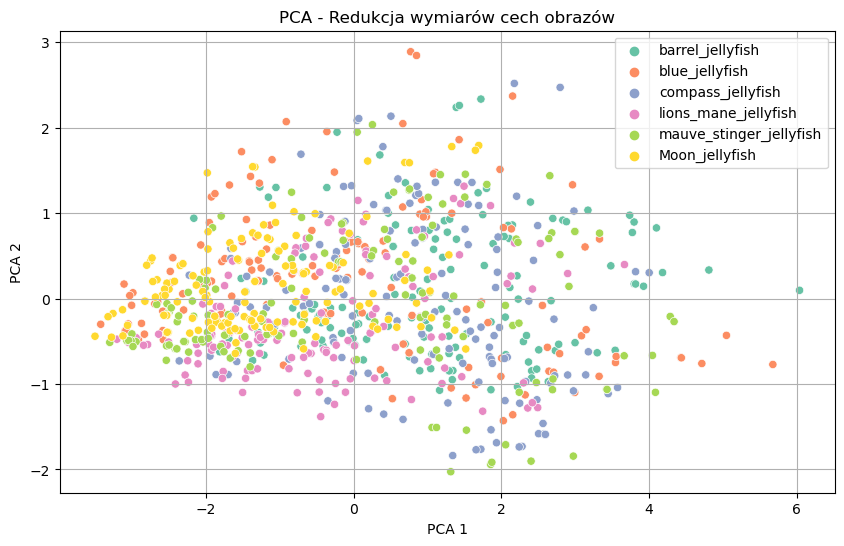

In [18]:
print("\nRedukcja wymiarowości (PCA) i wizualizacja danych...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title("PCA - Redukcja wymiarów cech obrazów")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
"""
🧠 Czym jest PCA (Principal Component Analysis)?
PCA to metoda redukcji wymiarowości, która:

szuka nowych osi, wzdłuż których dane najbardziej się „rozciągają”,

przekształca dane do przestrzeni o mniejszej liczbie wymiarów (np. 2D),

PCA 1 to oś, która najlepiej różnicuje dane,

PCA 2 to druga, prostopadła oś z kolejną największą wariancją.

📈 Jak czytać wykres PCA:
Każdy punkt to jeden obraz meduzy (po przetworzeniu na cechy).

Pozycja punktu pokazuje, jak różni się wizualnie od innych (np. kolorem, jasnością).

Jeśli punkty tego samego gatunku są blisko siebie i daleko od innych, to znaczy, że gatunki są rozróżnialne wizualnie.

Jeśli wszystko się miesza — potrzebujemy lepszych cech
"""

In [37]:
def extract_advanced_features(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (100, 100))
    
    # Jasność (średnia w odcieniach szarości)
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    avg_brightness = gray.mean()
    
    # Rozmazanie - wariancja Laplace'a (niska = rozmazane)
    blur_value = cv2.Laplacian(gray, cv2.CV_64F).var()
    
    # Średni kolor (RGB)
    avg_color = img_resized.mean(axis=(0, 1))
    
    # Dominujący odcień (Hue) - konwersja na HSV
    hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
    avg_hue = hsv[:, :, 0].mean()
    
    return [*avg_color, avg_brightness, blur_value, avg_hue]

print("\nEkstrakcja rozszerzonych cech wizualnych...")
X_adv = []
y_adv = []

for species in species_folders:
    species_dir = os.path.join(DATA_DIR, species)
    for file in os.listdir(species_dir):
        path = os.path.join(species_dir, file)
        features = extract_advanced_features(path)
        X_adv.append(features)
        y_adv.append(species)

X_adv = np.array(X_adv)
print(f"Zebrano {X_adv.shape[0]} zestawów cech rozszerzonych (RGB, jasność, rozmazanie, hue).")



Ekstrakcja rozszerzonych cech wizualnych...
Zebrano 900 zestawów cech rozszerzonych (RGB, jasność, rozmazanie, hue).
